In [3]:
# Data Preprocessing Mayorov Igor

In [201]:
# Устанавливаем все необходимые библиотеки для начала работы.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [202]:
# Загружаем наш датасет
mk = pd.read_csv('kontrol1.csv', sep=',')


In [203]:
mk

,Wind_direction,Pressure,Humidity,Temperature
0,268.4,914.7,75.7,3.7
1,119.1,914.4,75.1,3.5
2,118.9,915.4,74.8,3.1
3,114.9,914.5,73.0,3.3
4,107.6,914.9,72.8,3.3
...,...,...,...,...
3383,61.7,910.8,53.3,12.3
3384,62.1,910.3,53.0,12.6
3385,46.6,910.4,52.0,13.2
3386,64.4,910.8,51.6,13.4


In [204]:
# Смотрим статистику нашего датасета
mk.describe()

,Wind_direction,Pressure,Humidity,Temperature
count,3388.000000,3388.000000,3388.000000,3388.000000
mean,195.616972,895.082231,66.804073,-0.175679
std,99.193690,15.342975,21.265587,3.371892
min,14.900000,878.300000,20.200000,-8.500000
25%,96.200000,883.900000,52.675000,-2.600000
50%,232.900000,887.300000,66.250000,-0.200000
75%,294.300000,913.325000,83.125000,1.800000
max,349.900000,939.000000,99.400000,13.500000


In [205]:
# Проверяем наши данные на наличие пропусков
mk['Wind_direction'].unique(), mk['Temperature'].unique(), mk['Humidity'].unique() , mk['Pressure'].unique()

(array([268.4, 119.1, 118.9, 114.9, 107.6, 108.1, 108.6, 100.3,  88. ,
         87.4, 347.1, 347. , 312.8, 296.9, 287.1, 287.2, 286.8, 286.6,
        280.2, 258.8, 260.4, 254.7, 268.6, 291.5, 293.5, 310.5, 320.8,
        316.5, 305.2, 308.1, 313.7, 315. , 317.2, 316.6, 304.3, 300.9,
        291. , 282.2, 295.8, 297.8, 298.6, 306.8, 311.4, 307.6, 299.1,
        292.4, 296.6, 292.2, 280.5, 261.7, 279.5, 275.4, 271. , 268.1,
        288.2, 287.5, 291.3, 295.2, 291.6, 291.1, 297.6, 288.8, 273.2,
        277.4, 275.8, 274.7, 287.6, 285. , 294. , 298.5, 300.1, 299.9,
        301.3, 299.8, 301.7, 302.6, 293.6, 294.5, 284.6, 289.5, 297.4,
        302.2, 306.6, 303. , 311.7, 311.1, 314.5, 305.8, 309.2, 309.8,
        312.6, 316.7, 316.8, 305.7, 294.7, 298.7, 316.9, 338.7, 338.3,
        333.4, 334.5, 336.4, 338.1, 348. ,  30.2,  14.9,  15.1,  33.6,
         67.2,  84.1,  80.6, 104.3, 121.8,  96.6,  88.6,  86.1,  81.9,
         88.9,  66.1,  68. ,  80.5,  64.5,  74.1,  79.5,  86.4,  81.1,
      

In [206]:
# Проверяем наш дата сет на наличие выбросов и избавляемся от них.
def outliers(mk):
    num_var = list(mk._get_numeric_data().columns)
    for col_names in num_var:
        mk[col_names] = mk[col_names].apply(lambda y: mk[col_names].mean()-3*mk[col_names].std() 
                            if y < mk[col_names].mean()-3*mk[col_names].std() else y)
        mk[col_names] = mk[col_names].apply(lambda y: mk[col_names].mean()+3*mk[col_names].std() 
                            if y > mk[col_names].mean()+3*mk[col_names].std() else y)
    return(mk)

In [207]:
# Повторно смотрим на статистику датасета. Как итог, после преобразований ничего не изменилось, что означает, что выбросов не было
mk = outliers(mk)
mk.describe()

,Wind_direction,Pressure,Humidity,Temperature
count,3388.000000,3388.000000,3388.000000,3388.000000
mean,195.616972,895.082231,66.804073,-0.182946
std,99.193690,15.342975,21.265587,3.347246
min,14.900000,878.300000,20.200000,-8.500000
25%,96.200000,883.900000,52.675000,-2.600000
50%,232.900000,887.300000,66.250000,-0.200000
75%,294.300000,913.325000,83.125000,1.800000
max,349.900000,939.000000,99.400000,9.939996


In [208]:
mk

,Wind_direction,Pressure,Humidity,Temperature
0,268.4,914.7,75.7,3.700000
1,119.1,914.4,75.1,3.500000
2,118.9,915.4,74.8,3.100000
3,114.9,914.5,73.0,3.300000
4,107.6,914.9,72.8,3.300000
...,...,...,...,...
3383,61.7,910.8,53.3,9.939996
3384,62.1,910.3,53.0,9.939996
3385,46.6,910.4,52.0,9.939996
3386,64.4,910.8,51.6,9.939996


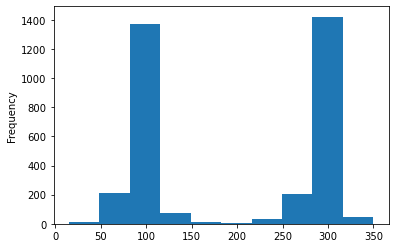

In [209]:
# Построим гистаграмы по каждой из переменных
mk['Wind_direction'].plot(kind = 'hist')

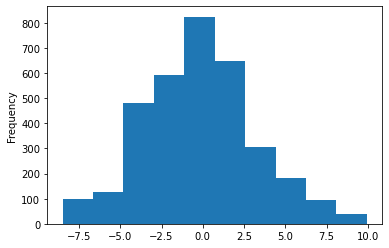

In [210]:
mk['Temperature'].plot(kind = 'hist')

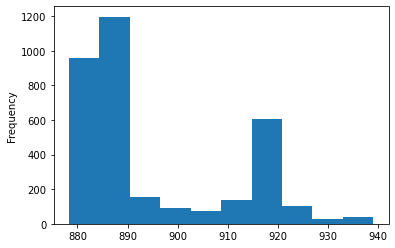

In [211]:
mk['Pressure'].plot(kind = 'hist')

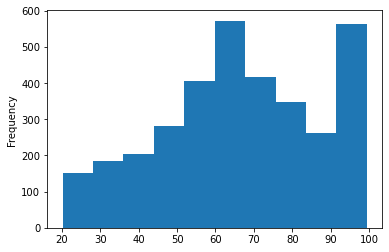

In [212]:
mk['Humidity'].plot(kind = 'hist')

In [213]:
# Строим корреляционную матрциу. Наиболее коррелируемым фактором является Pressure
mk.corr ()

,Wind_direction,Pressure,Humidity,Temperature
Wind_direction,1.000000,0.184148,-0.326748,0.269548
Pressure,0.184148,1.000000,-0.395000,0.272818
Humidity,-0.326748,-0.395000,1.000000,-0.167912
Temperature,0.269548,0.272818,-0.167912,1.000000


In [214]:
# Делим наш дата сет на обучающую и тестовую выборку. Записываем в х все значения кроме у. 
X = mk.iloc[:, :-1].values
y = mk.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [215]:
# Строим простую линейную регрессию зависимости от одного фактора (Humidity)
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 1:2], y_train)

In [216]:
# Оцениваем полученные параметры
sr.coef_, sr.intercept_

(array([0.05565474]), -50.024007427233265)

In [217]:
# Делаем прогноз 
y_pred = sr.predict(X_test[:, 1:2])

In [218]:
# Проверяем кэф. детерминации, который для обучающей выборки 0.06 значение но  0.11 для тестовой , что является совсем маленьким значением доверия.
sr.score(X_train[:, 1:2], y_train), sr.score(X_test[:, 1:2], y_test)

(0.06483535420178899, 0.11353332978580355)

In [219]:
# Расчитываем среднеквадратическую ошибку. Для обучающей выборки ошибка меьнше, чем для тестовой.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 1:2])), mean_squared_error(y_test, y_pred)

(10.655229944457695, 9.236134470482197)

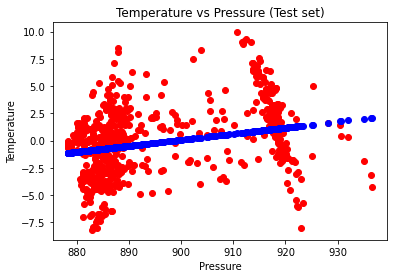

In [220]:
# Проиллюстрируем полученную модель. Можно сделать следующие выводы, что простая линейная регрессия описывает модель не точно.
plt.scatter(X_test[:,1], y_test, color = 'red')
plt.plot(X_test[:,1], sr.predict(X_test[:, 1:2]), 'bo')
plt.title('Temperature vs Pressure (Test set)')
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.show()

In [221]:
# Множественная регрессия. Проверяем P value - делаем выводы , что 2 переменные значимые и будем использовать их как основу.
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     113.4
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           3.61e-69
Time:                        19:41:52   Log-Likelihood:                -6981.7
No. Observations:                2710   AIC:                         1.397e+04
Df Residuals:                    2706   BIC:                         1.399e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.9981      3.959    -10.860      0.000     -50.762     -35.234
x1             0.0074      0.001     11.305      0.000       0.006       0.009
x2             0.0463      0.004     10.692      0.000       0.038       0.055
x3            -0.0012      0.003     -0.364      0.716      -0.008       0.005
==============================================================================
Omnibus:                       33.038   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.878
Skew:                           0.222   Prob(JB):                     9.82e-09
Kurtosis:                       3.359   Cond. No.                     5.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [222]:
# Определяем значимые переменные с погрешностью 5%.
def backwardElimination(x, sl):
    x = sm.add_constant(x)
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

import statsmodels.api as sm         
SL = 0.05
X_opt = X_train
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [223]:
X_train = X_train[:, [ 0, 1]]
X_test = X_test[:, [ 0, 1]]

In [224]:
# Строим множественную регрессию на обучающейся выборке.
mr = LinearRegression().fit(X_train, y_train)

In [225]:
# Получаем и оцениваем параметры.
mr.coef_, mr.intercept_

(array([0.00749535, 0.04687835]), -43.60941697242453)

In [226]:
# Строим прогноз.
y_pred = mr.predict(X_test)

In [227]:
# Проверяем кэф. детерминации, который равен 0.11 для обучающей,и 0.17 для тествой что сравнимо лучше чем в моделе однофактороной регрессии, но по прежнему низкий. Для тестовой выборки коэфициент отрицательный.
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.11163800133255364, 0.17671086477230258)

In [228]:
# Расчитываем среднеквадратическую ошибку. Для тестовой выборки ошибка меьнше, чем для обучабщей. Ошибка меньше в сравнении с однофакторной регрессией.
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(10.121962386249322, 8.577885008595599)

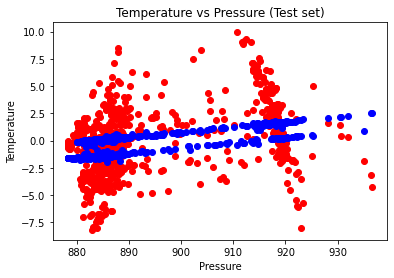

In [229]:
# Проиллюстрируем полученную модель. Можно сделать следующие выводы, что множественная линейная регрессия описывает модель лучше, чем однофакторная, стала более точнее.
plt.scatter(X_test[:,1], y_test, color = 'red')
plt.plot(X_test[:,1], mr.predict(X_test), 'bo')
plt.title('Temperature vs Pressure (Test set)')
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.show()

In [230]:
# Построим полиномиальную регрессию для нашего датасета.
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [231]:
# Получаем и оцениваем параметры
pr.coef_, pr.intercept_

(array([-2.77970834e-01,  1.10434763e+01,  8.31861338e-05,  2.82081776e-04,
        -6.12514567e-03]),
 -4975.347042549946)

In [232]:
# Строим прогноз
y_pred = pr.predict(X_test_p[:,1:])

In [233]:
# Проверяем кэф. детерминации,0,21 для обучающей и 0.24 для тестовой. Кэф. детерминации стал больше в сравнении с множественноей регрессией.
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.2175748914255773, 0.24381926493966766)

In [234]:
# Расчитываем среднеквадратическую ошибку. Для тестовой выборки ошибка меьнше, чем для обучающей. Ошибка меньше в сравнении с множественной регрессией.
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(8.914921542036872, 7.878679692850399)

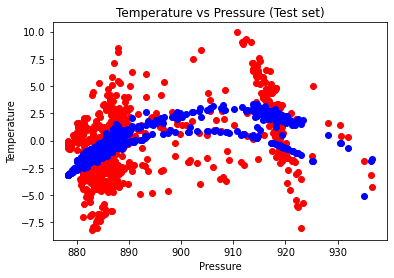

In [235]:
# Проиллюстрируем полученную модель. Можно сделать следующие выводы, что полиномиальная регрессия описывает модель лучше, чем однофакторная и множественная. Модель более точно описывает значения.
plt.scatter(X_test[:,1], y_test, color = 'red')
plt.plot(X_test[:,1], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('Temperature vs Pressure (Test set)')
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.show()

In [236]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('kr_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [237]:
# Загружаем наши данные для построения нейронной сети.
import pickle
input = open('kr_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [238]:
# Проводим шкалирование.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

In [239]:
# Подключаем необходимые библиотеки.
import keras
from keras.models import Sequential
from keras.layers import Dense


In [240]:
# Создаём сеть RNN, она будет последовательной. На первом и втором слое берем тангенс для повышенной точности. Для последнего слоя используем линейную функцию активациит 
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(units = 4, activation = 'tanh', input_dim = 2))

# Adding the second hidden layer
rnn.add(Dense(units = 3, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [241]:
# Обучаем нашу нейронную сеть.
rnn.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
271/271 [==============================] - 1s 2ms/step - loss: 1.6659 - accuracy: 0.0000e+00
Epoch 2/100
271/271 [==============================] - 0s 2ms/step - loss: 1.0034 - accuracy: 0.0000e+00
Epoch 3/100
271/271 [==============================] - 1s 3ms/step - loss: 0.8892 - accuracy: 0.0000e+00
Epoch 4/100
271/271 [==============================] - 1s 2ms/step - loss: 0.8716 - accuracy: 0.0000e+00
Epoch 5/100
271/271 [==============================] - 0s 2ms/step - loss: 0.8680 - accuracy: 0.0000e+00
Epoch 6/100
271/271 [==============================] - 0s 2ms/step - loss: 0.8657 - accuracy: 0.0000e+00
Epoch 7/100
271/271 [==============================] - 0s 2ms/step - loss: 0.8612 - accuracy: 0.0000e+00
Epoch 8/100
271/271 [==============================] - 0s 2ms/step - loss: 0.8579 - accuracy: 0.0000e+00
Epoch 9/100
271/271 [==============================] - 0s 2ms/step - loss: 0.8544 - accuracy: 0.0000e+00
Epoch 10/100
271/271 [==============================] -

271/271 [==============================] - 0s 2ms/step - loss: 0.7955 - accuracy: 0.0000e+00
Epoch 78/100
271/271 [==============================] - 0s 2ms/step - loss: 0.7950 - accuracy: 0.0000e+00
Epoch 79/100
271/271 [==============================] - 0s 2ms/step - loss: 0.7936 - accuracy: 0.0000e+00
Epoch 80/100
271/271 [==============================] - 0s 2ms/step - loss: 0.7941 - accuracy: 0.0000e+00
Epoch 81/100
271/271 [==============================] - 0s 2ms/step - loss: 0.7926 - accuracy: 0.0000e+00
Epoch 82/100
271/271 [==============================] - 0s 2ms/step - loss: 0.7922 - accuracy: 0.0000e+00
Epoch 83/100
271/271 [==============================] - 0s 2ms/step - loss: 0.7936 - accuracy: 0.0000e+00
Epoch 84/100
271/271 [==============================] - 0s 2ms/step - loss: 0.7925 - accuracy: 0.0000e+00
Epoch 85/100
271/271 [==============================] - 0s 2ms/step - loss: 0.7900 - accuracy: 0.0000e+00
Epoch 86/100
271/271 [==============================] - 0s 

In [242]:
# Строим прогноз.
y_pred = rnn.predict(X_test)

In [243]:
# Проводим обратное шкалирование
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [244]:
# Расчитываем среднеквадратическую ошибку. Она значительно меньше в сравнении с предыдущими моделями тестовой выборки.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

7.773689387091885

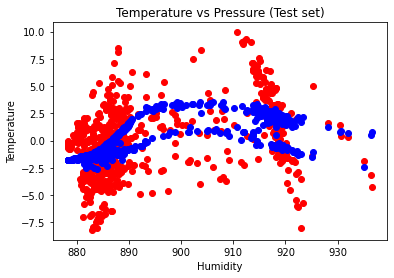

In [245]:
# Визуализируем нашу полученную модель. Как мы видим, что данная нейронная сеть наиболее точно описывает нашу выборку, в сравнении с другими моделями.
plt.scatter(X_test[:,1], y_test, color = 'red')
plt.plot(X_test[:,1], y_hat, 'bo')
plt.title('Temperature vs Pressure (Test set)')
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.show()